# Neural Networks (part 1)

## 1. Introduction 
Start by watching the following youtube video from 3blue1brown for a nice introduction in the concepts of neural networks (NN). The example that is used in the video is about handwriting digits classification. You will build a neural network that does exactly that.

The link to the video: https://www.youtube.com/watch?v=aircAruvnKk

Refer to the lecture notes on Canvas for the mathematical description of the network. In this notebook we will use the same names and conventions as used in the lecture notes.

## 2. Loading the data

In this notebook (NN part 1) you will use a NN to classify the dataset `ex2data1.txt` you used earlier in the logistic regression notebook.

In [1]:
# importing the required modules
import numpy as np
import matplotlib.pyplot as plt

# to get matplot figures render correctly in the notebook use:
%matplotlib inline 

In [2]:
# load the data
data = np.loadtxt("ex2data1.txt", delimiter=',')

## 3. Create the feature matrix X and labels matrix Y

The data that is fed into the NN constist of column vectors $\textbf x_i$ containing the features of the sample $i$. Because usually many samples are required to train and test the NN it is computationally not very efficient to pass them one-by-one. Therefore we have to write the code such that a whole batch of samples can be passed through the network simultaneously. To do so the data is organised in 2 matrices $\textbf X$ and $\textbf Y$
The feature matrix $\textbf X$ contains the features $\textbf x_i$ of the different samples as columns. If we have $m$ samples then $\textbf X \in \mathbb{R}^{n_0 \times m}$. Note that this is different than used sofar!

For every sample $\textbf x_i$ a corresponding column vector $\textbf y_i$ exists that gives the category to which the sample belongs. The vector $\textbf y_i$ is a so-called one-hot-encoded label and has $n_L$ (the number of nodes in the output layer) elements. Since each output node of the NN corresponds to one of the possible categories to which a sample belongs, the element of the vector $\textbf y_i$ that corresponds to the category of the sample is equal to 1 and all other elements are zero. For example, if we have two categories '0' and '1' (as is the case in the current problem where the student is either rejected or accepted), and let's say we have 4 samples belonging to category 1, 0, 0, 1 respectively then $\textbf Y$ is given by:

$$ \textbf Y = \begin{bmatrix}
0 & 1 & 1 & 0\\ 
1 & 0 & 0 & 1
\end{bmatrix} $$

The matrix $\textbf Y$ contains the one-hot encoded labels $\textbf y_i$ of the samples as columns. If we have $m$ samples then $\textbf Y \in \mathbb{R}^{n_L \times m}$

In [3]:
#create feature matrix + normalize
X = data[:,:-1]
normalized_X = (X - np.min(X)) / (np.max(X) - np.min(X))

# normalized_X= normalized_X.T
# print(normalized_X)
#create one-hot encoded Y matrix
Y= data[:,2].astype(int)
labels = data[:,2].astype(int)
Y_encoded = np.eye(2)[:, labels]

Next you need to split $X$ and $Y$ in a training set (data used to train the network) and a test set (data used to test the network). Normally you would also use a validation set to tune hyperparameters of the model/training but we leave that to part 2 of the NN notebook

In [4]:
# create a train and test dataset with size-ratio 9:1
'''YOUR CODE GOES HERE '''
train_X = normalized_X[:-10].T
train_Y = Y_encoded[:,:-10]
print(train_Y.shape)

test_X =normalized_X[-10:].T
test_Y = Y_encoded[:,-10:]
print(test_X.shape)

(2, 90)
(2, 10)


## 4. The Neural Network

The NN that you will make has the following layout:

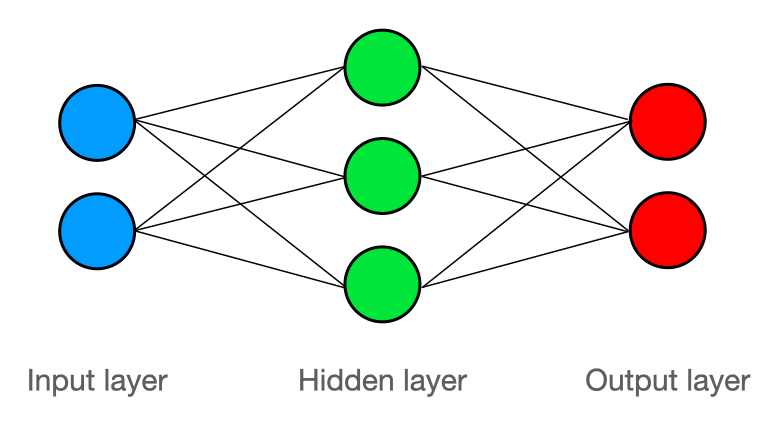

It consists of an input layer with two nodes because each sample consists of two features (score test 1 and score test 2). Then we have one hidden layer consisting of three nodes. Finally the output layer has two nodes corresponding to the two categories that need to be distinghuished.

The hidden layer has a **sigmoid** activation function while the outputlayer has a **softmax** activation function. 

### Define the activation functions

Below you define the required activation functions and their derivatives

In [5]:
# define some activation functions

def sigmoid(z):
    """
    returns the sigmoid function of z

    Parameters
    ----------
    z : float or ndarray

    Returns
    -------
    out : same type and shape as z

    """
    
    '''YOUR CODE GOES HERE '''
    return 1 / (1 + np.exp(-z))


def sigmoid_diff(z):
    """
    returns the derivative of the sigmoid function of z

    Parameters
    ----------
    z : float or ndarray

    Returns
    -------
    out : same type and shape as z

    """
    
    '''YOUR CODE GOES HERE '''
    return sigmoid(z)*(1-sigmoid(z))


def softmax(z):
    """
    returns the softmax function of z

    Parameters
    ----------
    z : 2D ndarray

    Returns
    -------
    out : same type and shape as z

    """
    
    # Calculate the softmax function by dividing exp(z) by the sum of exp(z)
    softmax_z = np.exp(z) / np.sum(np.exp(z), axis=0, keepdims=True)
    
    return softmax_z









### Initalize the weights and biases
The layers are denoted with $l$. Our NN has an input layer ($l=0$), an output layer ($l=L=2$) and a hidden layer ($l=1$).

For each layer $l$ we have:
1. A number of nodes: $n_l$
2. A weight matrix: $\textbf W^{l} \in \mathbb{R}^{n_l \times n_{l-1}}$
3. A bias (column) vector: $\textbf b^{l} \in \mathbb{R}^{n_l \times 1}$

The input layer actually does not do much, it just passes the sample data to the output which then acts as input for the first hidden layer. So the input layer does not have a weight and bias.

The biases can be initialized with zeros; the weight's of layer $l$ are best intialized with random numbers from a normal distribution with mean 0 and standard deviation of $\sqrt{1/n_{l-1}}$. 

In [6]:
# intialize the neural network
rng = np.random.default_rng()

# number of nodes in each layer
n0 = 2
n1 = 3
n2 = 2

# input layer
# no weights and biases
 
# hidden layer (l=1)
W1 = np.random.normal(0, 1/np.sqrt(n0), (n1, n0))
b1 = np.random.normal(0, size= (n1, 1))
#print(b1.shape)
# print(W1)

# output layer (l=2)
W2 = np.random.normal(0, 1/np.sqrt(n1), (n2, n1))
b2 = np.random.normal(0, size= (n2, 1))

print(W1.shape)


(3, 2)


## 5. Train the NN

Firt you define three parameters that can be adjusted for optimal training.
- **learning_rate**: determines to what extend we update the weights and biases in the gradient descent step
- **no_epochs**: the number of times we pass the training data set through the network for training
- **batch_size**: how many samples we pass through the network before doing a gradient descent update

In [7]:
# train settings
learning_rate = 0.01
no_epochs = 10000
batch_size = 10

Below you implement the training of the network. A general layout (pseudocode) is already given. Note that we use the **Cross Entropy** (CE) loss function.

In [8]:
# perform the training
training_set=[]
X_batches = []
Y_batches = []
acc_history=[]
losses= []

# def get_predictions(A2):
#     return np.argmax(A2, 0)

# def get_accuracy(predictions, Y):
#     print(predictions, "Y:",Y)
#     return np.sum(predictions == Y) / Y.size

# print(train_Y.shape)
for i in range(0,9):
    
    X_batches.append(train_X[:,10*i:10*i+10])
    Y_batches.append(train_Y[:,10*i:10*i+10])
    
# print(len(X_batches))
# print(Y_batches)

# print(b1.shape)
# print(W1.shape)
pre_factor = learning_rate / batch_size 
# print(Y_batches)

for epoch in range(1,  no_epochs+1):
    
    # for each epoch train over all batches
    for X_batch, Y_batch in zip(X_batches,Y_batches):
    ## forward pass
        # compute the output of the network for the batch
        output1 = W1 @ X_batch + b1  
        output2 = W2 @ sigmoid(output1) + b2 

     ## backward pass
        # compute the derivatives dLdW and dLdb for the layers (use CE loss)
       
        dLdz2= softmax(output2) - Y_batch ## gradient of loss function (predicted - target probabilities = prediction error)
        dLdW2 = dLdz2@ sigmoid(output1).T

        dLdz1= sigmoid_diff(output1) *(W2.T@dLdz2)
        dLdW1 = dLdz1@ X_batch.T

        
        
        
        dLdb1 = np.sum(dLdz1, axis=1, keepdims=True)
        dLdb2 = np.sum(dLdz2, axis=1, keepdims=True)
        
        # gradient descent step / update weights and biases
        W2 = W2 - pre_factor * dLdW2
        b2 = b2 - pre_factor * dLdb2
        W1 = W1 - pre_factor * dLdW1
        b1 = b1 - pre_factor * dLdb1

#         print("Y batch:",Y_batch)
#         print("a2:",a2)


    # for each epoch evaluate the network performance
    # compute accuracy of train set and store for later analysis
    
#     predictions= get_predictions(a2)
#     print("Predictions:", predictions)
#     print(get_accuracy(predictions, Y_batch))
    
#     print(b1.shape)

    z1 = W1 @ train_X + b1
    z2 = W2 @ sigmoid(z1) + b2
    Output = softmax(z2)
    predicted_labels = np.argmax(Output, axis=0)
#     print("predicts:",predicted_labels)
    true_labels = np.argmax(train_Y, axis=0)
#     print("true labels:",true_labels)
    accuracy = np.mean(predicted_labels == true_labels)
    acc_history.append(accuracy)
    M= train_X.shape[1]
    losses.append(-1/M * np.sum(train_Y*np.log(Output)))

    # for each epoch print info on learning progress

    print(f"Epoch {epoch}/{no_epochs}: train_acc={accuracy:.2%}")

    

Epoch 1/10000: train_acc=43.33%
Epoch 2/10000: train_acc=41.11%
Epoch 3/10000: train_acc=42.22%
Epoch 4/10000: train_acc=41.11%
Epoch 5/10000: train_acc=37.78%
Epoch 6/10000: train_acc=38.89%
Epoch 7/10000: train_acc=40.00%
Epoch 8/10000: train_acc=45.56%
Epoch 9/10000: train_acc=46.67%
Epoch 10/10000: train_acc=47.78%
Epoch 11/10000: train_acc=46.67%
Epoch 12/10000: train_acc=48.89%
Epoch 13/10000: train_acc=52.22%
Epoch 14/10000: train_acc=52.22%
Epoch 15/10000: train_acc=51.11%
Epoch 16/10000: train_acc=51.11%
Epoch 17/10000: train_acc=50.00%
Epoch 18/10000: train_acc=57.78%
Epoch 19/10000: train_acc=57.78%
Epoch 20/10000: train_acc=56.67%
Epoch 21/10000: train_acc=58.89%
Epoch 22/10000: train_acc=57.78%
Epoch 23/10000: train_acc=57.78%
Epoch 24/10000: train_acc=56.67%
Epoch 25/10000: train_acc=56.67%
Epoch 26/10000: train_acc=57.78%
Epoch 27/10000: train_acc=58.89%
Epoch 28/10000: train_acc=58.89%
Epoch 29/10000: train_acc=58.89%
Epoch 30/10000: train_acc=57.78%
Epoch 31/10000: tra

Epoch 385/10000: train_acc=83.33%
Epoch 386/10000: train_acc=83.33%
Epoch 387/10000: train_acc=83.33%
Epoch 388/10000: train_acc=83.33%
Epoch 389/10000: train_acc=83.33%
Epoch 390/10000: train_acc=83.33%
Epoch 391/10000: train_acc=83.33%
Epoch 392/10000: train_acc=83.33%
Epoch 393/10000: train_acc=83.33%
Epoch 394/10000: train_acc=83.33%
Epoch 395/10000: train_acc=83.33%
Epoch 396/10000: train_acc=83.33%
Epoch 397/10000: train_acc=83.33%
Epoch 398/10000: train_acc=83.33%
Epoch 399/10000: train_acc=83.33%
Epoch 400/10000: train_acc=83.33%
Epoch 401/10000: train_acc=83.33%
Epoch 402/10000: train_acc=83.33%
Epoch 403/10000: train_acc=83.33%
Epoch 404/10000: train_acc=83.33%
Epoch 405/10000: train_acc=83.33%
Epoch 406/10000: train_acc=83.33%
Epoch 407/10000: train_acc=83.33%
Epoch 408/10000: train_acc=83.33%
Epoch 409/10000: train_acc=83.33%
Epoch 410/10000: train_acc=83.33%
Epoch 411/10000: train_acc=83.33%
Epoch 412/10000: train_acc=83.33%
Epoch 413/10000: train_acc=83.33%
Epoch 414/1000

Epoch 813/10000: train_acc=88.89%
Epoch 814/10000: train_acc=88.89%
Epoch 815/10000: train_acc=88.89%
Epoch 816/10000: train_acc=88.89%
Epoch 817/10000: train_acc=88.89%
Epoch 818/10000: train_acc=88.89%
Epoch 819/10000: train_acc=88.89%
Epoch 820/10000: train_acc=88.89%
Epoch 821/10000: train_acc=88.89%
Epoch 822/10000: train_acc=88.89%
Epoch 823/10000: train_acc=88.89%
Epoch 824/10000: train_acc=88.89%
Epoch 825/10000: train_acc=88.89%
Epoch 826/10000: train_acc=88.89%
Epoch 827/10000: train_acc=88.89%
Epoch 828/10000: train_acc=90.00%
Epoch 829/10000: train_acc=90.00%
Epoch 830/10000: train_acc=90.00%
Epoch 831/10000: train_acc=90.00%
Epoch 832/10000: train_acc=90.00%
Epoch 833/10000: train_acc=90.00%
Epoch 834/10000: train_acc=90.00%
Epoch 835/10000: train_acc=90.00%
Epoch 836/10000: train_acc=90.00%
Epoch 837/10000: train_acc=90.00%
Epoch 838/10000: train_acc=90.00%
Epoch 839/10000: train_acc=90.00%
Epoch 840/10000: train_acc=90.00%
Epoch 841/10000: train_acc=90.00%
Epoch 842/1000

Epoch 1153/10000: train_acc=90.00%
Epoch 1154/10000: train_acc=90.00%
Epoch 1155/10000: train_acc=90.00%
Epoch 1156/10000: train_acc=90.00%
Epoch 1157/10000: train_acc=90.00%
Epoch 1158/10000: train_acc=90.00%
Epoch 1159/10000: train_acc=90.00%
Epoch 1160/10000: train_acc=90.00%
Epoch 1161/10000: train_acc=90.00%
Epoch 1162/10000: train_acc=90.00%
Epoch 1163/10000: train_acc=90.00%
Epoch 1164/10000: train_acc=90.00%
Epoch 1165/10000: train_acc=90.00%
Epoch 1166/10000: train_acc=90.00%
Epoch 1167/10000: train_acc=90.00%
Epoch 1168/10000: train_acc=90.00%
Epoch 1169/10000: train_acc=90.00%
Epoch 1170/10000: train_acc=90.00%
Epoch 1171/10000: train_acc=90.00%
Epoch 1172/10000: train_acc=90.00%
Epoch 1173/10000: train_acc=90.00%
Epoch 1174/10000: train_acc=90.00%
Epoch 1175/10000: train_acc=90.00%
Epoch 1176/10000: train_acc=90.00%
Epoch 1177/10000: train_acc=90.00%
Epoch 1178/10000: train_acc=90.00%
Epoch 1179/10000: train_acc=90.00%
Epoch 1180/10000: train_acc=90.00%
Epoch 1181/10000: tr

Epoch 1494/10000: train_acc=88.89%
Epoch 1495/10000: train_acc=88.89%
Epoch 1496/10000: train_acc=88.89%
Epoch 1497/10000: train_acc=88.89%
Epoch 1498/10000: train_acc=88.89%
Epoch 1499/10000: train_acc=88.89%
Epoch 1500/10000: train_acc=88.89%
Epoch 1501/10000: train_acc=88.89%
Epoch 1502/10000: train_acc=88.89%
Epoch 1503/10000: train_acc=88.89%
Epoch 1504/10000: train_acc=88.89%
Epoch 1505/10000: train_acc=88.89%
Epoch 1506/10000: train_acc=88.89%
Epoch 1507/10000: train_acc=88.89%
Epoch 1508/10000: train_acc=88.89%
Epoch 1509/10000: train_acc=88.89%
Epoch 1510/10000: train_acc=88.89%
Epoch 1511/10000: train_acc=88.89%
Epoch 1512/10000: train_acc=88.89%
Epoch 1513/10000: train_acc=88.89%
Epoch 1514/10000: train_acc=88.89%
Epoch 1515/10000: train_acc=88.89%
Epoch 1516/10000: train_acc=88.89%
Epoch 1517/10000: train_acc=88.89%
Epoch 1518/10000: train_acc=88.89%
Epoch 1519/10000: train_acc=88.89%
Epoch 1520/10000: train_acc=88.89%
Epoch 1521/10000: train_acc=88.89%
Epoch 1522/10000: tr

Epoch 1893/10000: train_acc=88.89%
Epoch 1894/10000: train_acc=88.89%
Epoch 1895/10000: train_acc=88.89%
Epoch 1896/10000: train_acc=88.89%
Epoch 1897/10000: train_acc=88.89%
Epoch 1898/10000: train_acc=88.89%
Epoch 1899/10000: train_acc=88.89%
Epoch 1900/10000: train_acc=88.89%
Epoch 1901/10000: train_acc=88.89%
Epoch 1902/10000: train_acc=88.89%
Epoch 1903/10000: train_acc=88.89%
Epoch 1904/10000: train_acc=88.89%
Epoch 1905/10000: train_acc=88.89%
Epoch 1906/10000: train_acc=88.89%
Epoch 1907/10000: train_acc=88.89%
Epoch 1908/10000: train_acc=88.89%
Epoch 1909/10000: train_acc=88.89%
Epoch 1910/10000: train_acc=88.89%
Epoch 1911/10000: train_acc=88.89%
Epoch 1912/10000: train_acc=88.89%
Epoch 1913/10000: train_acc=88.89%
Epoch 1914/10000: train_acc=88.89%
Epoch 1915/10000: train_acc=88.89%
Epoch 1916/10000: train_acc=88.89%
Epoch 1917/10000: train_acc=88.89%
Epoch 1918/10000: train_acc=88.89%
Epoch 1919/10000: train_acc=88.89%
Epoch 1920/10000: train_acc=88.89%
Epoch 1921/10000: tr

Epoch 2334/10000: train_acc=88.89%
Epoch 2335/10000: train_acc=88.89%
Epoch 2336/10000: train_acc=88.89%
Epoch 2337/10000: train_acc=88.89%
Epoch 2338/10000: train_acc=88.89%
Epoch 2339/10000: train_acc=88.89%
Epoch 2340/10000: train_acc=88.89%
Epoch 2341/10000: train_acc=88.89%
Epoch 2342/10000: train_acc=88.89%
Epoch 2343/10000: train_acc=88.89%
Epoch 2344/10000: train_acc=88.89%
Epoch 2345/10000: train_acc=88.89%
Epoch 2346/10000: train_acc=88.89%
Epoch 2347/10000: train_acc=88.89%
Epoch 2348/10000: train_acc=88.89%
Epoch 2349/10000: train_acc=88.89%
Epoch 2350/10000: train_acc=88.89%
Epoch 2351/10000: train_acc=88.89%
Epoch 2352/10000: train_acc=88.89%
Epoch 2353/10000: train_acc=88.89%
Epoch 2354/10000: train_acc=88.89%
Epoch 2355/10000: train_acc=88.89%
Epoch 2356/10000: train_acc=88.89%
Epoch 2357/10000: train_acc=88.89%
Epoch 2358/10000: train_acc=88.89%
Epoch 2359/10000: train_acc=88.89%
Epoch 2360/10000: train_acc=88.89%
Epoch 2361/10000: train_acc=88.89%
Epoch 2362/10000: tr

Epoch 2672/10000: train_acc=88.89%
Epoch 2673/10000: train_acc=88.89%
Epoch 2674/10000: train_acc=88.89%
Epoch 2675/10000: train_acc=88.89%
Epoch 2676/10000: train_acc=88.89%
Epoch 2677/10000: train_acc=88.89%
Epoch 2678/10000: train_acc=88.89%
Epoch 2679/10000: train_acc=88.89%
Epoch 2680/10000: train_acc=88.89%
Epoch 2681/10000: train_acc=88.89%
Epoch 2682/10000: train_acc=88.89%
Epoch 2683/10000: train_acc=88.89%
Epoch 2684/10000: train_acc=88.89%
Epoch 2685/10000: train_acc=88.89%
Epoch 2686/10000: train_acc=88.89%
Epoch 2687/10000: train_acc=88.89%
Epoch 2688/10000: train_acc=88.89%
Epoch 2689/10000: train_acc=88.89%
Epoch 2690/10000: train_acc=88.89%
Epoch 2691/10000: train_acc=88.89%
Epoch 2692/10000: train_acc=88.89%
Epoch 2693/10000: train_acc=88.89%
Epoch 2694/10000: train_acc=88.89%
Epoch 2695/10000: train_acc=88.89%
Epoch 2696/10000: train_acc=88.89%
Epoch 2697/10000: train_acc=88.89%
Epoch 2698/10000: train_acc=88.89%
Epoch 2699/10000: train_acc=88.89%
Epoch 2700/10000: tr

Epoch 3032/10000: train_acc=88.89%
Epoch 3033/10000: train_acc=88.89%
Epoch 3034/10000: train_acc=88.89%
Epoch 3035/10000: train_acc=88.89%
Epoch 3036/10000: train_acc=88.89%
Epoch 3037/10000: train_acc=88.89%
Epoch 3038/10000: train_acc=88.89%
Epoch 3039/10000: train_acc=88.89%
Epoch 3040/10000: train_acc=88.89%
Epoch 3041/10000: train_acc=88.89%
Epoch 3042/10000: train_acc=88.89%
Epoch 3043/10000: train_acc=88.89%
Epoch 3044/10000: train_acc=88.89%
Epoch 3045/10000: train_acc=88.89%
Epoch 3046/10000: train_acc=88.89%
Epoch 3047/10000: train_acc=88.89%
Epoch 3048/10000: train_acc=88.89%
Epoch 3049/10000: train_acc=88.89%
Epoch 3050/10000: train_acc=88.89%
Epoch 3051/10000: train_acc=88.89%
Epoch 3052/10000: train_acc=88.89%
Epoch 3053/10000: train_acc=88.89%
Epoch 3054/10000: train_acc=88.89%
Epoch 3055/10000: train_acc=88.89%
Epoch 3056/10000: train_acc=88.89%
Epoch 3057/10000: train_acc=88.89%
Epoch 3058/10000: train_acc=88.89%
Epoch 3059/10000: train_acc=88.89%
Epoch 3060/10000: tr

Epoch 3567/10000: train_acc=88.89%
Epoch 3568/10000: train_acc=88.89%
Epoch 3569/10000: train_acc=88.89%
Epoch 3570/10000: train_acc=88.89%
Epoch 3571/10000: train_acc=88.89%
Epoch 3572/10000: train_acc=88.89%
Epoch 3573/10000: train_acc=88.89%
Epoch 3574/10000: train_acc=88.89%
Epoch 3575/10000: train_acc=88.89%
Epoch 3576/10000: train_acc=88.89%
Epoch 3577/10000: train_acc=88.89%
Epoch 3578/10000: train_acc=88.89%
Epoch 3579/10000: train_acc=88.89%
Epoch 3580/10000: train_acc=88.89%
Epoch 3581/10000: train_acc=88.89%
Epoch 3582/10000: train_acc=88.89%
Epoch 3583/10000: train_acc=88.89%
Epoch 3584/10000: train_acc=88.89%
Epoch 3585/10000: train_acc=88.89%
Epoch 3586/10000: train_acc=88.89%
Epoch 3587/10000: train_acc=88.89%
Epoch 3588/10000: train_acc=88.89%
Epoch 3589/10000: train_acc=88.89%
Epoch 3590/10000: train_acc=88.89%
Epoch 3591/10000: train_acc=88.89%
Epoch 3592/10000: train_acc=88.89%
Epoch 3593/10000: train_acc=88.89%
Epoch 3594/10000: train_acc=88.89%
Epoch 3595/10000: tr

Epoch 3904/10000: train_acc=88.89%
Epoch 3905/10000: train_acc=88.89%
Epoch 3906/10000: train_acc=88.89%
Epoch 3907/10000: train_acc=88.89%
Epoch 3908/10000: train_acc=88.89%
Epoch 3909/10000: train_acc=88.89%
Epoch 3910/10000: train_acc=88.89%
Epoch 3911/10000: train_acc=88.89%
Epoch 3912/10000: train_acc=88.89%
Epoch 3913/10000: train_acc=88.89%
Epoch 3914/10000: train_acc=88.89%
Epoch 3915/10000: train_acc=88.89%
Epoch 3916/10000: train_acc=88.89%
Epoch 3917/10000: train_acc=88.89%
Epoch 3918/10000: train_acc=88.89%
Epoch 3919/10000: train_acc=88.89%
Epoch 3920/10000: train_acc=88.89%
Epoch 3921/10000: train_acc=88.89%
Epoch 3922/10000: train_acc=88.89%
Epoch 3923/10000: train_acc=88.89%
Epoch 3924/10000: train_acc=88.89%
Epoch 3925/10000: train_acc=88.89%
Epoch 3926/10000: train_acc=88.89%
Epoch 3927/10000: train_acc=88.89%
Epoch 3928/10000: train_acc=88.89%
Epoch 3929/10000: train_acc=88.89%
Epoch 3930/10000: train_acc=88.89%
Epoch 3931/10000: train_acc=88.89%
Epoch 3932/10000: tr

Epoch 4502/10000: train_acc=88.89%
Epoch 4503/10000: train_acc=88.89%
Epoch 4504/10000: train_acc=88.89%
Epoch 4505/10000: train_acc=88.89%
Epoch 4506/10000: train_acc=88.89%
Epoch 4507/10000: train_acc=88.89%
Epoch 4508/10000: train_acc=88.89%
Epoch 4509/10000: train_acc=88.89%
Epoch 4510/10000: train_acc=88.89%
Epoch 4511/10000: train_acc=88.89%
Epoch 4512/10000: train_acc=88.89%
Epoch 4513/10000: train_acc=88.89%
Epoch 4514/10000: train_acc=88.89%
Epoch 4515/10000: train_acc=88.89%
Epoch 4516/10000: train_acc=88.89%
Epoch 4517/10000: train_acc=88.89%
Epoch 4518/10000: train_acc=88.89%
Epoch 4519/10000: train_acc=88.89%
Epoch 4520/10000: train_acc=88.89%
Epoch 4521/10000: train_acc=88.89%
Epoch 4522/10000: train_acc=88.89%
Epoch 4523/10000: train_acc=88.89%
Epoch 4524/10000: train_acc=88.89%
Epoch 4525/10000: train_acc=88.89%
Epoch 4526/10000: train_acc=88.89%
Epoch 4527/10000: train_acc=88.89%
Epoch 4528/10000: train_acc=88.89%
Epoch 4529/10000: train_acc=88.89%
Epoch 4530/10000: tr

Epoch 4909/10000: train_acc=88.89%
Epoch 4910/10000: train_acc=88.89%
Epoch 4911/10000: train_acc=88.89%
Epoch 4912/10000: train_acc=88.89%
Epoch 4913/10000: train_acc=88.89%
Epoch 4914/10000: train_acc=88.89%
Epoch 4915/10000: train_acc=88.89%
Epoch 4916/10000: train_acc=88.89%
Epoch 4917/10000: train_acc=88.89%
Epoch 4918/10000: train_acc=88.89%
Epoch 4919/10000: train_acc=88.89%
Epoch 4920/10000: train_acc=88.89%
Epoch 4921/10000: train_acc=88.89%
Epoch 4922/10000: train_acc=88.89%
Epoch 4923/10000: train_acc=88.89%
Epoch 4924/10000: train_acc=88.89%
Epoch 4925/10000: train_acc=88.89%
Epoch 4926/10000: train_acc=88.89%
Epoch 4927/10000: train_acc=88.89%
Epoch 4928/10000: train_acc=88.89%
Epoch 4929/10000: train_acc=88.89%
Epoch 4930/10000: train_acc=88.89%
Epoch 4931/10000: train_acc=88.89%
Epoch 4932/10000: train_acc=88.89%
Epoch 4933/10000: train_acc=88.89%
Epoch 4934/10000: train_acc=88.89%
Epoch 4935/10000: train_acc=88.89%
Epoch 4936/10000: train_acc=88.89%
Epoch 4937/10000: tr

Epoch 5171/10000: train_acc=90.00%
Epoch 5172/10000: train_acc=90.00%
Epoch 5173/10000: train_acc=90.00%
Epoch 5174/10000: train_acc=90.00%
Epoch 5175/10000: train_acc=90.00%
Epoch 5176/10000: train_acc=90.00%
Epoch 5177/10000: train_acc=90.00%
Epoch 5178/10000: train_acc=90.00%
Epoch 5179/10000: train_acc=90.00%
Epoch 5180/10000: train_acc=90.00%
Epoch 5181/10000: train_acc=90.00%
Epoch 5182/10000: train_acc=90.00%
Epoch 5183/10000: train_acc=90.00%
Epoch 5184/10000: train_acc=90.00%
Epoch 5185/10000: train_acc=90.00%
Epoch 5186/10000: train_acc=90.00%
Epoch 5187/10000: train_acc=90.00%
Epoch 5188/10000: train_acc=90.00%
Epoch 5189/10000: train_acc=91.11%
Epoch 5190/10000: train_acc=91.11%
Epoch 5191/10000: train_acc=91.11%
Epoch 5192/10000: train_acc=91.11%
Epoch 5193/10000: train_acc=91.11%
Epoch 5194/10000: train_acc=91.11%
Epoch 5195/10000: train_acc=91.11%
Epoch 5196/10000: train_acc=91.11%
Epoch 5197/10000: train_acc=91.11%
Epoch 5198/10000: train_acc=91.11%
Epoch 5199/10000: tr

Epoch 5500/10000: train_acc=91.11%
Epoch 5501/10000: train_acc=91.11%
Epoch 5502/10000: train_acc=91.11%
Epoch 5503/10000: train_acc=91.11%
Epoch 5504/10000: train_acc=91.11%
Epoch 5505/10000: train_acc=91.11%
Epoch 5506/10000: train_acc=91.11%
Epoch 5507/10000: train_acc=91.11%
Epoch 5508/10000: train_acc=91.11%
Epoch 5509/10000: train_acc=91.11%
Epoch 5510/10000: train_acc=91.11%
Epoch 5511/10000: train_acc=91.11%
Epoch 5512/10000: train_acc=91.11%
Epoch 5513/10000: train_acc=91.11%
Epoch 5514/10000: train_acc=91.11%
Epoch 5515/10000: train_acc=91.11%
Epoch 5516/10000: train_acc=91.11%
Epoch 5517/10000: train_acc=91.11%
Epoch 5518/10000: train_acc=91.11%
Epoch 5519/10000: train_acc=91.11%
Epoch 5520/10000: train_acc=91.11%
Epoch 5521/10000: train_acc=91.11%
Epoch 5522/10000: train_acc=91.11%
Epoch 5523/10000: train_acc=91.11%
Epoch 5524/10000: train_acc=91.11%
Epoch 5525/10000: train_acc=91.11%
Epoch 5526/10000: train_acc=91.11%
Epoch 5527/10000: train_acc=91.11%
Epoch 5528/10000: tr

Epoch 5839/10000: train_acc=92.22%
Epoch 5840/10000: train_acc=92.22%
Epoch 5841/10000: train_acc=92.22%
Epoch 5842/10000: train_acc=92.22%
Epoch 5843/10000: train_acc=92.22%
Epoch 5844/10000: train_acc=92.22%
Epoch 5845/10000: train_acc=92.22%
Epoch 5846/10000: train_acc=92.22%
Epoch 5847/10000: train_acc=92.22%
Epoch 5848/10000: train_acc=92.22%
Epoch 5849/10000: train_acc=92.22%
Epoch 5850/10000: train_acc=92.22%
Epoch 5851/10000: train_acc=92.22%
Epoch 5852/10000: train_acc=92.22%
Epoch 5853/10000: train_acc=92.22%
Epoch 5854/10000: train_acc=92.22%
Epoch 5855/10000: train_acc=92.22%
Epoch 5856/10000: train_acc=92.22%
Epoch 5857/10000: train_acc=92.22%
Epoch 5858/10000: train_acc=92.22%
Epoch 5859/10000: train_acc=92.22%
Epoch 5860/10000: train_acc=92.22%
Epoch 5861/10000: train_acc=92.22%
Epoch 5862/10000: train_acc=92.22%
Epoch 5863/10000: train_acc=92.22%
Epoch 5864/10000: train_acc=92.22%
Epoch 5865/10000: train_acc=92.22%
Epoch 5866/10000: train_acc=92.22%
Epoch 5867/10000: tr

Epoch 6217/10000: train_acc=92.22%
Epoch 6218/10000: train_acc=92.22%
Epoch 6219/10000: train_acc=92.22%
Epoch 6220/10000: train_acc=92.22%
Epoch 6221/10000: train_acc=92.22%
Epoch 6222/10000: train_acc=92.22%
Epoch 6223/10000: train_acc=92.22%
Epoch 6224/10000: train_acc=92.22%
Epoch 6225/10000: train_acc=92.22%
Epoch 6226/10000: train_acc=92.22%
Epoch 6227/10000: train_acc=92.22%
Epoch 6228/10000: train_acc=92.22%
Epoch 6229/10000: train_acc=92.22%
Epoch 6230/10000: train_acc=92.22%
Epoch 6231/10000: train_acc=92.22%
Epoch 6232/10000: train_acc=92.22%
Epoch 6233/10000: train_acc=92.22%
Epoch 6234/10000: train_acc=92.22%
Epoch 6235/10000: train_acc=92.22%
Epoch 6236/10000: train_acc=92.22%
Epoch 6237/10000: train_acc=92.22%
Epoch 6238/10000: train_acc=92.22%
Epoch 6239/10000: train_acc=92.22%
Epoch 6240/10000: train_acc=92.22%
Epoch 6241/10000: train_acc=92.22%
Epoch 6242/10000: train_acc=92.22%
Epoch 6243/10000: train_acc=92.22%
Epoch 6244/10000: train_acc=92.22%
Epoch 6245/10000: tr

Epoch 6854/10000: train_acc=94.44%
Epoch 6855/10000: train_acc=94.44%
Epoch 6856/10000: train_acc=94.44%
Epoch 6857/10000: train_acc=94.44%
Epoch 6858/10000: train_acc=94.44%
Epoch 6859/10000: train_acc=94.44%
Epoch 6860/10000: train_acc=94.44%
Epoch 6861/10000: train_acc=94.44%
Epoch 6862/10000: train_acc=94.44%
Epoch 6863/10000: train_acc=94.44%
Epoch 6864/10000: train_acc=94.44%
Epoch 6865/10000: train_acc=94.44%
Epoch 6866/10000: train_acc=94.44%
Epoch 6867/10000: train_acc=94.44%
Epoch 6868/10000: train_acc=94.44%
Epoch 6869/10000: train_acc=94.44%
Epoch 6870/10000: train_acc=94.44%
Epoch 6871/10000: train_acc=94.44%
Epoch 6872/10000: train_acc=94.44%
Epoch 6873/10000: train_acc=94.44%
Epoch 6874/10000: train_acc=94.44%
Epoch 6875/10000: train_acc=94.44%
Epoch 6876/10000: train_acc=94.44%
Epoch 6877/10000: train_acc=94.44%
Epoch 6878/10000: train_acc=94.44%
Epoch 6879/10000: train_acc=94.44%
Epoch 6880/10000: train_acc=94.44%
Epoch 6881/10000: train_acc=94.44%
Epoch 6882/10000: tr

Epoch 7186/10000: train_acc=94.44%
Epoch 7187/10000: train_acc=94.44%
Epoch 7188/10000: train_acc=94.44%
Epoch 7189/10000: train_acc=94.44%
Epoch 7190/10000: train_acc=94.44%
Epoch 7191/10000: train_acc=94.44%
Epoch 7192/10000: train_acc=94.44%
Epoch 7193/10000: train_acc=94.44%
Epoch 7194/10000: train_acc=94.44%
Epoch 7195/10000: train_acc=94.44%
Epoch 7196/10000: train_acc=94.44%
Epoch 7197/10000: train_acc=94.44%
Epoch 7198/10000: train_acc=94.44%
Epoch 7199/10000: train_acc=94.44%
Epoch 7200/10000: train_acc=94.44%
Epoch 7201/10000: train_acc=94.44%
Epoch 7202/10000: train_acc=94.44%
Epoch 7203/10000: train_acc=94.44%
Epoch 7204/10000: train_acc=94.44%
Epoch 7205/10000: train_acc=94.44%
Epoch 7206/10000: train_acc=94.44%
Epoch 7207/10000: train_acc=94.44%
Epoch 7208/10000: train_acc=94.44%
Epoch 7209/10000: train_acc=94.44%
Epoch 7210/10000: train_acc=94.44%
Epoch 7211/10000: train_acc=94.44%
Epoch 7212/10000: train_acc=94.44%
Epoch 7213/10000: train_acc=94.44%
Epoch 7214/10000: tr

Epoch 7641/10000: train_acc=95.56%
Epoch 7642/10000: train_acc=95.56%
Epoch 7643/10000: train_acc=95.56%
Epoch 7644/10000: train_acc=95.56%
Epoch 7645/10000: train_acc=95.56%
Epoch 7646/10000: train_acc=95.56%
Epoch 7647/10000: train_acc=95.56%
Epoch 7648/10000: train_acc=95.56%
Epoch 7649/10000: train_acc=95.56%
Epoch 7650/10000: train_acc=95.56%
Epoch 7651/10000: train_acc=95.56%
Epoch 7652/10000: train_acc=95.56%
Epoch 7653/10000: train_acc=95.56%
Epoch 7654/10000: train_acc=95.56%
Epoch 7655/10000: train_acc=95.56%
Epoch 7656/10000: train_acc=95.56%
Epoch 7657/10000: train_acc=95.56%
Epoch 7658/10000: train_acc=95.56%
Epoch 7659/10000: train_acc=95.56%
Epoch 7660/10000: train_acc=95.56%
Epoch 7661/10000: train_acc=95.56%
Epoch 7662/10000: train_acc=95.56%
Epoch 7663/10000: train_acc=95.56%
Epoch 7664/10000: train_acc=95.56%
Epoch 7665/10000: train_acc=95.56%
Epoch 7666/10000: train_acc=95.56%
Epoch 7667/10000: train_acc=95.56%
Epoch 7668/10000: train_acc=95.56%
Epoch 7669/10000: tr

Epoch 8025/10000: train_acc=95.56%
Epoch 8026/10000: train_acc=95.56%
Epoch 8027/10000: train_acc=95.56%
Epoch 8028/10000: train_acc=95.56%
Epoch 8029/10000: train_acc=95.56%
Epoch 8030/10000: train_acc=95.56%
Epoch 8031/10000: train_acc=95.56%
Epoch 8032/10000: train_acc=95.56%
Epoch 8033/10000: train_acc=95.56%
Epoch 8034/10000: train_acc=95.56%
Epoch 8035/10000: train_acc=95.56%
Epoch 8036/10000: train_acc=95.56%
Epoch 8037/10000: train_acc=95.56%
Epoch 8038/10000: train_acc=95.56%
Epoch 8039/10000: train_acc=95.56%
Epoch 8040/10000: train_acc=95.56%
Epoch 8041/10000: train_acc=95.56%
Epoch 8042/10000: train_acc=95.56%
Epoch 8043/10000: train_acc=95.56%
Epoch 8044/10000: train_acc=95.56%
Epoch 8045/10000: train_acc=95.56%
Epoch 8046/10000: train_acc=95.56%
Epoch 8047/10000: train_acc=95.56%
Epoch 8048/10000: train_acc=95.56%
Epoch 8049/10000: train_acc=95.56%
Epoch 8050/10000: train_acc=95.56%
Epoch 8051/10000: train_acc=95.56%
Epoch 8052/10000: train_acc=95.56%
Epoch 8053/10000: tr

Epoch 8534/10000: train_acc=96.67%
Epoch 8535/10000: train_acc=96.67%
Epoch 8536/10000: train_acc=96.67%
Epoch 8537/10000: train_acc=96.67%
Epoch 8538/10000: train_acc=96.67%
Epoch 8539/10000: train_acc=96.67%
Epoch 8540/10000: train_acc=96.67%
Epoch 8541/10000: train_acc=96.67%
Epoch 8542/10000: train_acc=96.67%
Epoch 8543/10000: train_acc=96.67%
Epoch 8544/10000: train_acc=96.67%
Epoch 8545/10000: train_acc=96.67%
Epoch 8546/10000: train_acc=96.67%
Epoch 8547/10000: train_acc=96.67%
Epoch 8548/10000: train_acc=96.67%
Epoch 8549/10000: train_acc=96.67%
Epoch 8550/10000: train_acc=96.67%
Epoch 8551/10000: train_acc=96.67%
Epoch 8552/10000: train_acc=96.67%
Epoch 8553/10000: train_acc=96.67%
Epoch 8554/10000: train_acc=96.67%
Epoch 8555/10000: train_acc=96.67%
Epoch 8556/10000: train_acc=96.67%
Epoch 8557/10000: train_acc=96.67%
Epoch 8558/10000: train_acc=96.67%
Epoch 8559/10000: train_acc=96.67%
Epoch 8560/10000: train_acc=96.67%
Epoch 8561/10000: train_acc=96.67%
Epoch 8562/10000: tr

Epoch 9263/10000: train_acc=98.89%
Epoch 9264/10000: train_acc=98.89%
Epoch 9265/10000: train_acc=98.89%
Epoch 9266/10000: train_acc=98.89%
Epoch 9267/10000: train_acc=98.89%
Epoch 9268/10000: train_acc=98.89%
Epoch 9269/10000: train_acc=98.89%
Epoch 9270/10000: train_acc=98.89%
Epoch 9271/10000: train_acc=98.89%
Epoch 9272/10000: train_acc=98.89%
Epoch 9273/10000: train_acc=98.89%
Epoch 9274/10000: train_acc=98.89%
Epoch 9275/10000: train_acc=98.89%
Epoch 9276/10000: train_acc=98.89%
Epoch 9277/10000: train_acc=98.89%
Epoch 9278/10000: train_acc=98.89%
Epoch 9279/10000: train_acc=98.89%
Epoch 9280/10000: train_acc=98.89%
Epoch 9281/10000: train_acc=98.89%
Epoch 9282/10000: train_acc=98.89%
Epoch 9283/10000: train_acc=98.89%
Epoch 9284/10000: train_acc=98.89%
Epoch 9285/10000: train_acc=98.89%
Epoch 9286/10000: train_acc=98.89%
Epoch 9287/10000: train_acc=98.89%
Epoch 9288/10000: train_acc=98.89%
Epoch 9289/10000: train_acc=98.89%
Epoch 9290/10000: train_acc=98.89%
Epoch 9291/10000: tr

## 6. Analyze the result
To analyze the result compute the losses and the accuracy of the test set. Also make a plot of the training loss and training accuracy as function of the epoch.

In [9]:
# compute the accuracy and losses of the test set

z1 = W1 @ test_X + b1
z2 = W2 @ sigmoid(z1) + b2
Output = softmax(z2)
predicted_labels = np.argmax(Output, axis=0)
print("predicts:",predicted_labels)
true_labels = np.argmax(test_Y, axis=0)
print("true labels:",true_labels)
accuracy = np.mean(predicted_labels == true_labels)
#acc_history.append(accuracy)
M= test_X.shape[1]
#losses.append(-1/M * np.sum(test_Y*np.log(Output)))

print(accuracy)


predicts: [1 1 0 1 1 1 1 1 1 1]
true labels: [1 1 0 1 1 1 1 1 1 1]
1.0


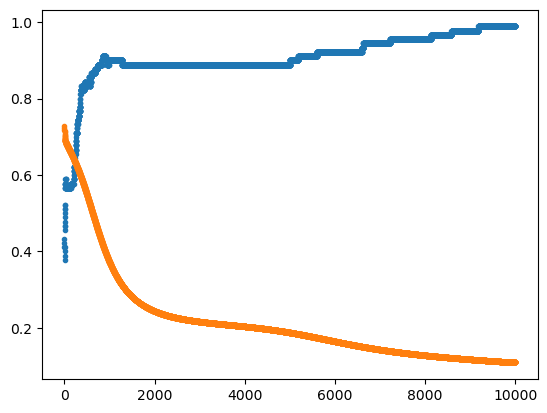

In [10]:
# plot the loss and accuracy as function of the epoch number

plt.scatter(range(no_epochs),acc_history, marker='.')
plt.scatter(range(no_epochs),losses, marker='.')


Below you find some code to plot the data and the model prediction. 

Text(0, 0.5, 'Normalized Score test 2')

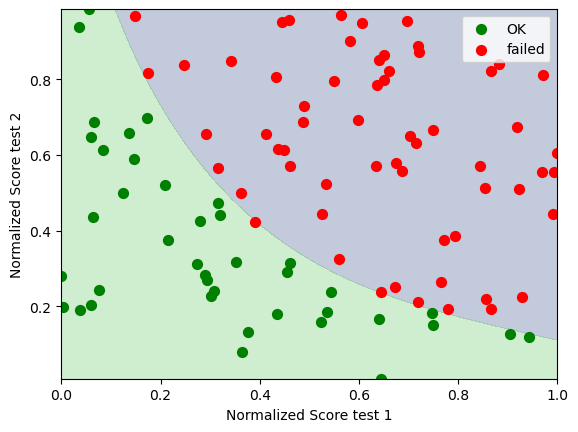

In [11]:
# visualize the results
X= normalized_X.T
Y= Y_encoded

# plot the model as a filled contour plot
# build mesh of gridpoints
x1_min, x1_max = X[0,:].min(), X[0,:].max()
x2_min, x2_max = X[1,:].min(), X[1,:].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))

# compute hypothesis on the meshgrid 
# first create a 2xM ndarray with the values of the scores on the mesh 
X_mesh = np.vstack((xx1.ravel(), xx2.ravel()))

# compute the output of the network
a1 = sigmoid(W1 @ X_mesh + b1)
a2 = softmax(W2 @ a1 + b2)
h = a2[0] # select either one of the two features
h = h.reshape(xx1.shape)

# plot the contour level(s)
levels = [0.0, 0.5, 1.0]
plt.contourf(xx1, xx2, h, levels, alpha=0.3)

# plot the data
mask = Y[0] == 1
plt.scatter(*X[:2, mask], s=50, c='g', marker='o', label='OK')
plt.scatter(*X[:2,~mask], s=50, c='r', marker='o', label='failed')
plt.legend()
plt.xlabel('Normalized Score test 1')
plt.ylabel('Normalized Score test 2')